# Nearest Neighbors Exercises

In [ ]:
import numpy as np
import pandas as po
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Problem 1

Consider the following simple data-set:

<img src="https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/Images/Week1/knn_notebook_example_table.png" alt="Example Table" width="600">

Now consider the Sample:
    $$X= 4, Y = 4, Z = 2$$

Using kNN, what is the class for this sample for $k = 1$ and $k = 3?$ Use the Eucledian metric.

For k = 1, the class would be 1  
For k = 3, the class would be 2

## Problem 2
Earlier in the tutorial we were told that kNN depends on several factors, one of them being $k$. Consider the following datasets below, find the optimal value of $k$ that gives the highest accuracy. Visualize your data! Can you come up with some rule for getting a good idea of what $k$ is? 

HINT: look for a pattern/bound! Answer should be in terms of the size of the dataset $n$. 

In [ ]:
# Solve this problem for each of these datasets
from sklearn.datasets import load_iris 
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine 

# Load those datasets into some easily accessible variables
# The datasets are already normalized, so that saves us some steps!
iris = load_iris()                    #iris dataset: size = 150
breast_cancer = load_breast_cancer()  #diabetes dataset: size = 569
wine = load_wine()                    #wine dataset: size 178

# This function will perfom KNN classification for a specified k
def split_train_test_dataset(dataset, k, test_size=0.2):
    """Loads and performs KNN classification on the provided dataset"""
    # Grab and split the dataset
    X_train, X_val, y_train, y_val = train_test_split(
        dataset.data, dataset.target, test_size=test_size, random_state=0)

    # Build a KNN classifier, fit it and test its predictions
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #print("Validation Accuracy is {:5.1%}".format(
    #    accuracy_score(y_val, knn.predict(X_val))))
    return accuracy_score(y_val, knn.predict(X_val))

In [ ]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


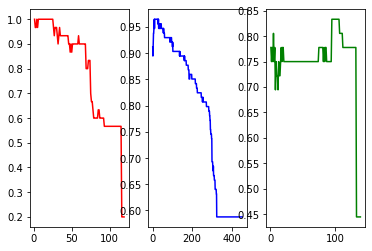

In [ ]:
X_iris = []
Y_iris = []
X_breast = []
Y_breast = []
X_wine = []
Y_wine = []

for i in range(1, 120):
    X_iris.append(i)
    Y_iris.append(split_train_test_dataset(iris, i))
print('\n')

for i in range(1, 455):
    X_breast.append(i)
    Y_breast.append(split_train_test_dataset(breast_cancer,i))
print('\n')

for i in range(1,140):
    X_wine.append(i)
    Y_wine.append(split_train_test_dataset(wine,i))

plt.subplot(1,3,1)
plt.plot(X_iris,Y_iris,"r-")
plt.subplot(1,3,2)
plt.plot(X_breast, Y_breast, 'b-')
plt.subplot(1,3,3)
plt.plot(X_wine, Y_wine, 'g-')

plt.show()

In [ ]:
for i in range(1, 30):
    print(i, split_train_test_dataset(iris, i))
print('\n')

for i in range(5, 50):
    print(i, split_train_test_dataset(breast_cancer, i))
print('\n')

for i in range(90,115):
    print(i, split_train_test_dataset(wine, i))


1 1.0
2 0.9666666666666667
3 0.9666666666666667
4 1.0
5 0.9666666666666667
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 0.9666666666666667
27 0.9333333333333333
28 0.9666666666666667
29 0.9666666666666667


5 0.9385964912280702
6 0.9385964912280702
7 0.9473684210526315
8 0.9473684210526315
9 0.9649122807017544
10 0.9473684210526315
11 0.9649122807017544
12 0.9649122807017544
13 0.9649122807017544
14 0.9649122807017544
15 0.9649122807017544
16 0.9649122807017544
17 0.9649122807017544
18 0.9649122807017544
19 0.9649122807017544
20 0.9649122807017544
21 0.9649122807017544
22 0.9649122807017544
23 0.9649122807017544
24 0.9649122807017544
25 0.9649122807017544
26 0.9649122807017544
27 0.956140350877193
28 0.9649122807017544
29 0.956140350877193
30 0.9649122807017544
31 0.9473684210526315
32 0.9473684210526315
33 0.9473684210526315
34 0.9473684210526315
35 0.9473684210526315
36 0.9473684210526315
37

Write a single mathematical expression describing the relationship you found between $n$ (the size of the dataset) and $k$ (the number of datapoints used to classify each validation datum).

The optimal value for K is approximately sqrt(n).

## Problem 3
Now, we will **be writing our k-NNA**. Recall that we said a kNN is comprised of a predictions and using those predictions to classify the data. Here we will try to mimic sklearn's kNN methods. We will be using the Pima diabetes dataset. 

### Loading and splitting data

In [ ]:
url = "https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = po.read_csv(url, names=names)

# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

Now, let's clearly define which columns will act as explanatory variables, and which column will be the target value, and split the dataset between your training data and testing data. Let's try an 80-20 split and use sklearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method (set random_state = 0 so we get the same output each time).

In [ ]:
# Columns we will use to make predictions with (features!) feel free to play around with these
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

# Column that we want to predict (the labels)
y_col = 'class'

# 80-20 train-test split of datset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# Further split X and y of training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

print('There are {} training samples with {} features and {} associated classification labels'.format(*X_train.shape, *y_train.shape))
print('There are {} validation samples with {} features and {} associated classification labels'.format(*X_val.shape, *y_val.shape))
print('There are {} test samples with {} features and {} associated classification labels'.format(*X_test.shape, *y_test.shape))

There are 250 training samples with 8 features and 250 associated classification labels
There are 63 validation samples with 8 features and 63 associated classification labels
There are 79 test samples with 8 features and 79 associated classification labels


### Normalizing Data

Let's not forget to normalize the data! We'll use sklearn's StandardScaler normalization like we did before to normalize the training **and** validation/data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in list(X_train):
    feature_data_train = X_train[i].values.reshape(-1, 1)
    scaler.fit(feature_data_train)
    X_train[i] = scaler.transform(feature_data_train)

for j in list(X_test):
    feature_data_test = X_test[j].values.reshape(-1, 1)
    scaler.fit(feature_data_test)
    X_test[j] = scaler.transform(feature_data_test)
    
for k in list(X_val):
    feature_data_val = X_val[k].values.reshape(-1, 1)
    scaler.fit(feature_data_val)
    X_val[k] = scaler.transform(feature_data_val)

### Writing your kNN

Now for the fun part! Fill in the 3 following methods, euclidean_dist(), predict(), and knn().

The predict method that we'll make below needs to: 
1. Compute the euclidean distance between the “new” observation and all the data points in the training set. 
2. Assign the corresponding label to the observation
3. Select the k nearest ones and perform a "majority vote"

In [ ]:
# Euclidean distance function from tutorial
def euclidean_dist(datum1, datum2):
    inner_val = 0.0
    
    for g in range(datum1.shape[0]):
        inner_val += (datum1[g]- datum2[g]) ** 2
    
    distance = np.sqrt(inner_val)
    return(distance)

In [ ]:
from collections import Counter
#print(X_val.head(5))
#print(y_train.head(5))
#print(X_val.iloc[0])

def predict(x_training, y_training, x_test_sample, k):
    # Create list for distances and targets

    distances = []
    targets = []
    
    for x in range(len(x_test_sample)):
        distances.append([euclidean_dist(x_training.iloc[x].values,x_test_sample.values),x])
    distances = sorted(distances)
    
    print(distances)
    #print(len(distances))
    
    for i in range(k):
        dis = distances[i][1]
        targets.append(y_training.iloc[dis])
    c = Counter(targets)
    return c.most_common()[0][0]


#print(predict(X_train, y_train, X_val.iloc[0], k =5))
#print(y_train.head(5))

         preg      plas      pres      skin      test      mass      pedi  \
112  1.209666  0.235141  0.671314  0.617177  1.421038  1.510127 -0.742346   
42  -0.658200 -1.661758 -1.607084 -1.100871 -0.745255 -1.562683 -0.514171   
62   0.088946  1.319084 -0.467885  0.617177  0.352628  0.116644 -0.425586   
263  0.088946  1.108317 -0.040686 -1.100871 -0.531573 -0.228750 -0.661814   
206 -0.658200  1.379303 -0.183086  1.702260  2.961021  1.057543  0.503221   

          age  
112  2.632404  
42  -0.979388  
62   0.224543  
263 -0.076440  
206 -0.076440  
173    0
289    0
115    1
335    0
181    0
Name: class, dtype: int64
preg    1.209666
plas    0.235141
pres    0.671314
skin    0.617177
test    1.421038
mass    1.510127
pedi   -0.742346
age     2.632404
Name: 112, dtype: float64


In [ ]:
def knn(x_training, y_training, x_testing, k):
    
    # YOUR CODE HERE
    predictions = []
    for i in range(len(x_testing)):
        predictions.append(predict(x_training, y_training, x_testing.iloc[i], k))
    
    return predictions

When done, test your code by running the methods here!

In [ ]:
from sklearn.metrics import accuracy_score
import time

start = time.time()
predictions_slow = knn(X_train, y_train, X_val, k=5)

print('Took {} seconds'.format(time.time() - start))
print("Validation Accuracy is ", accuracy_score(y_val,predictions_slow)*100)

[[2.9578017465562643, 2], [3.988980073220532, 3], [4.376144653987124, 6], [4.5677054153319965, 4], [4.694459895226043, 5], [4.806127005388316, 1], [4.990172825227306, 7], [6.071320981419358, 0]]
[[2.5705028555141363, 0], [2.616567726158422, 4], [2.6267988871742207, 5], [2.7353952965167396, 7], [3.094891849486243, 1], [3.940588758083138, 3], [6.009120212872763, 2], [6.061674067112084, 6]]
[[2.005715444412722, 5], [2.027181447983004, 3], [2.710365013922749, 4], [2.9328136059204373, 2], [3.041766016875986, 1], [3.1808491952705347, 0], [3.241895266741024, 7], [4.644755136039006, 6]]
[[1.800707031847946, 5], [2.5384457105858167, 3], [2.714036182041731, 4], [2.744305342069906, 0], [2.87927491414952, 2], [3.063537354177021, 7], [3.1420142423704367, 1], [4.185573537903491, 6]]
[[4.406417492428614, 3], [4.682236686283322, 5], [4.7105045428338785, 2], [4.738141597553827, 1], [4.986716938846658, 4], [5.0057351223521875, 7], [5.297249471780417, 0], [6.941018333984514, 6]]
[[3.3149641184041396, 2],

Check sklearn's predictions on validation data from the tutorial notebook and make sure they match yours. Sklearn is faster, but you should get the same answers.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6aa92908-daf4-47cc-a24d-1e94a9949d60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>